<a href="https://colab.research.google.com/github/StephenTGibson/MScDataSci_21-22/blob/main/COMP527-DataMiningAndVisualisation/k_medoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering: k-Medoids
COMP527-DataMiningAndVisualisation/k_medoids.ipynb

In this lab tasks we implement k-Medoids algorithm.

In [65]:
import numpy as np
import matplotlib.pyplot as plt

We start with generating synthetic dataset consisting of four clusters.

In [84]:
N = 100

#Generate dataset
np.random.seed(844)
clust1 = np.random.normal(5, 2, (N,2))
clust2 = np.random.normal(15, 2, (N,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], N)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], N)
dataset = np.concatenate((clust1, clust2, clust3, clust4))

#Create an array that stores cluster IDs of every object in our dataset
#We will use the index of a medoid as a cluster ID
clusters = np.zeros((len(dataset)))

In [67]:
dataset.shape

(400, 2)

In [68]:
def cluster_plots(dataset, medoidInd=[], colours = 'gray', title = 'Dataset'):
    fig,ax = plt.subplots(figsize=(4,4))
    #fig.set_size_inches(12, 12)
    ax.set_title(title,fontsize=14)
    ax.set_xlim(min(dataset[:,0]), max(dataset[:,0]))
    ax.set_ylim(min(dataset[:,1]), max(dataset[:,1]))
    ax.scatter(dataset[:, 0], dataset[:, 1],s=8,lw=1,c= colours)

    #Plot medoids if they are given
    if len(medoidInd) > 0:
        ax.scatter(dataset[medoidInd, 0], dataset[medoidInd, 1],s=8,lw=6,c='red')
    fig.tight_layout()
    plt.show()

Let's plot our dataset

In [69]:
medoidTest = np.array([1,2,3])

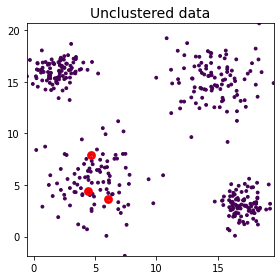

In [70]:
cluster_plots(dataset, medoidInd=medoidTest, colours=clusters, title='Unclustered data')

## Exercise 1

Implement k-medoids algorithm. Use the Euclidean distance as the dissimilarity measure.

In [25]:
# Assignment - all objects to closest medoid

In [71]:
def dissimilarityComputer(obj1, obj2): # Euclidean

  return np.sqrt((obj1[0]-obj2[0])**2 + (obj1[1]-obj2[1])**2)

In [72]:
def clusterIdentifier(objectFeatures, medoids):

  distances = []

  for medoid in medoids:

    distances.append(dissimilarityComputer(objectFeatures, dataset[medoid]))

  return medoids[distances.index(min(distances))]

In [73]:
def objectClusterAssigner(dataset, clusters, medoids):

  for objectIdx in range(dataset.shape[0]):

    #if objectIdx not in medoids:

    clusters[objectIdx] = clusterIdentifier(dataset[objectIdx], medoids)

  return clusters.astype(int)

In [94]:
# Initialisation: choose k random objects
k = 6
medoids = np.random.choice(dataset.shape[0], k).astype(int)

# Assignment
clusters = objectClusterAssigner(dataset, clusters, medoids)


In [95]:
medoids

array([357, 225, 302,  33, 246,  90])

In [96]:
clusters[:5]

array([90, 90, 90, 90, 90])

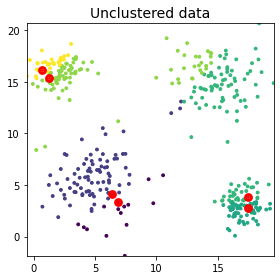

In [97]:
cluster_plots(dataset, medoidInd=medoids, colours=clusters, title='Unclustered data')

In [88]:
def objectiveScorer(dataset, clusters):

  objectiveScore = 0

  for objectIdx in range(dataset.shape[0]):
    
    objectiveScore += dissimilarityComputer(dataset[objectIdx], dataset[clusters[objectIdx]])

  return objectiveScore

In [89]:
objectiveScorer(dataset, clusters)

1614.0375480007701

In [98]:
# loop over medoids
for medoidIdx in range(medoids.shape[0]):

  scores = []
  # loop over objects
  for objectIdx in range(dataset.shape[0]):

    medoidsTest = medoids.copy()
    # replace update medoid to be current object
    medoidsTest[medoidIdx] = objectIdx

    # assign objects to clusters using new test medoid
    clustersTest = objectClusterAssigner(dataset, clusters, medoidsTest)

    # compute objective func
    score = objectiveScorer(dataset, clustersTest)
    # store
    scores.append(score)

  # get best objective func
  best = min(scores)

  # if best obj func better than current
  if best < objectiveScorer(dataset, clusters):

    # replace medoid with object giving best obj func
    medoids[medoidIdx] = scores.index(best)
    
    # Assign new clusters
    clusters = objectClusterAssigner(dataset, clusters, medoids)

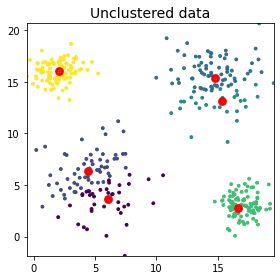

In [99]:
cluster_plots(dataset, medoidInd=medoids, colours=clusters, title='Unclustered data')

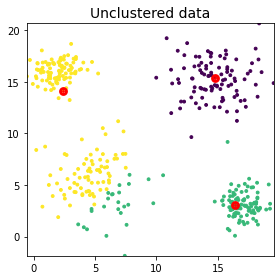

In [81]:
cluster_plots(dataset, medoidInd=medoids, colours=clusters, title='Unclustered data')

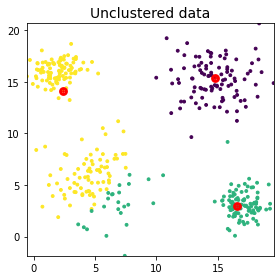

In [83]:
cluster_plots(dataset, medoidInd=medoids, colours=clusters, title='Unclustered data')

## Exercise 2

1. Apply the implemented k-medoids algorithm to the generated dataset with the parameter k=4.
2. For every iteration of the algorithm  
    - output the current value of the objective function
    - output the indices of the current medoid objects
    - plot the clustering together with medoids